## Running QCHEM to populate the OpenFermion MolecularData class

The module run_qchem.py provides a user-friendly way of reading (or running in the future..) QCHEM calculations in OpenFermion. The basic idea is that once one generates a MolecularData instance, one can then call QCHEM with a specification of certain options (for instance, how much memory to use and what calculations to do) in order to read (or compute in the future..) things about the molecule, update the MolecularData object, and save results of the calculation.

To use this plugin, you will need to personally download QCHEM.

Warnings: electronic structure calculations are finicky. They sometimes fail for surprising reasons. See the QCHEM documentation for more information or consult and electronic structure theory expert.

In [1]:
import openfermion
from openfermion.chem import MolecularData
from openfermionqchem import run_qchem

In [2]:
# Set molecule parameters.
# We do not run calculations through OpenFermion directly.
basis        = 'sto-3g'
multiplicity = 1

# Generate molecule at different bond lengths.
bond_length_interval = 0.2
n_points = 10
hf_energies   = []
ccsd_energies = []
bond_lengths  = []

for point in range(1, n_points + 1):
    bond_length    = bond_length_interval * float(point)
    bond_lengths  += [bond_length]
    geometry       = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    
    # Generate a MolecularData instance
    molecule       = MolecularData(geometry, basis, multiplicity)
    
    # Run run_qchem module.
    # Users need to specify file directory with OpenFermion/Q-CHEM v0.0.
    file_directory = '/Users/yongbin/Desktop/venv/openfermion-qchem/molecules/h2/sto-3g/'+str(round(bond_length,2))+'/'
    # Update the MolecularData instance
    molecule       = run_qchem(molecule,file_directory=file_directory,output_name='test_qis')
    
    # Print out some results of calculation.
    print('\nAt bond length of {} angstrom, molecular hydrogen has:'.format(bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('CCSD energy of {} Hartree.'.format(molecule.ccsd_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies   += [molecule.hf_energy]
    ccsd_energies += [molecule.ccsd_energy]


At bond length of 0.2 angstrom, molecular hydrogen has:
Hartree-Fock energy of 0.1641750115 Hartree.
MP2 energy of 0.15904267 Hartree.
CCSD energy of 0.15748213 Hartree.
Nuclear repulsion energy between protons is 2.64588605 Hartree.
Spatial orbital 0 has energy of -0.858824528 Hartree.
Spatial orbital 1 has energy of 1.57236203 Hartree.

At bond length of 0.4 angstrom, molecular hydrogen has:
Hartree-Fock energy of -0.9043613944 Hartree.
MP2 energy of -0.91143682 Hartree.
CCSD energy of -0.91414971 Hartree.
Nuclear repulsion energy between protons is 1.32294303 Hartree.
Spatial orbital 0 has energy of -0.745212534 Hartree.
Spatial orbital 1 has energy of 1.1674164 Hartree.

At bond length of 0.6000000000000001 angstrom, molecular hydrogen has:
Hartree-Fock energy of -1.1011282424 Hartree.
MP2 energy of -1.11133214 Hartree.
CCSD energy of -1.11628605 Hartree.
Nuclear repulsion energy between protons is 0.88196202 Hartree.
Spatial orbital 0 has energy of -0.640876266 Hartree.
Spatial o

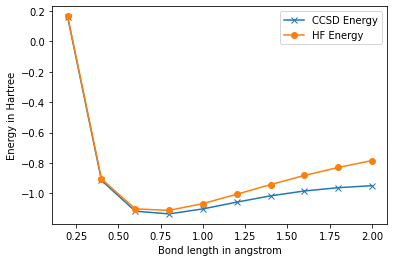

In [3]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, ccsd_energies, 'x-', label='CCSD Energy')
plt.plot(bond_lengths, hf_energies, 'o-', label='HF Energy')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

## UNIT TEST

Whenver users modify central code of the openfermion-qchem plugin, you can check whether the plugin keep producing correct FCI energies of hydrogen molecule systems.

In [4]:
from openfermionqchem import run_test

run_test()

Molecule:      H2/STO-3G
Bond distance: 0.75
FCI energy in Hartees for reference:         -1.13711707
Direct diagonalization through OpenFermion:  -1.13711707
fidelity; FCI / Direct diagonalization:       1.0
Molecule:      H2/3-21G
Bond distance: 0.75
FCI energy in Hartees for reference:         -1.14787738
Direct diagonalization through OpenFermion:  -1.14787739
fidelity; FCI / Direct diagonalization:       1.0
Molecule:      H2/6-311G
Bond distance: 0.75
FCI energy in Hartees for reference:         -1.15349121
Direct diagonalization through OpenFermion:  -1.15349122
fidelity; FCI / Direct diagonalization:       1.0


Check whether the QCHEM Hamiltonian is compatible to Openfermion modules
test1: Interaction operator
test2: Jordan-Wigner transformation
test3: Diagonalized energy

In [5]:
from openfermion.ops import InteractionOperator
from openfermion.transforms import jordan_wigner
from openfermion.linalg import get_sparse_operator, get_ground_state

basis        = 'sto-3g'
multiplicity = 1
bond_length  = 0.75  
geometry     = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
molecule     = MolecularData(geometry, basis, multiplicity)
    
# Run QCHEM.
# Additional step, users need to specify file directory to read.
# Need to think more clever way.. 
file_directory = '/Users/yongbin/Desktop/venv/openfermion-qchem/molecules/h2/sto-3g/'+str(bond_length)+'/'
molecule       = run_qchem(molecule,file_directory=file_directory,output_name='test_qis')
    
hamiltonian       = InteractionOperator(molecule.nuclear_repulsion,molecule.one_body_integrals,0.25*molecule.two_body_integrals)
jw_hamiltonian    = jordan_wigner(hamiltonian)
ground_energy, _  = get_ground_state(get_sparse_operator(hamiltonian))

print(hamiltonian)
print('='*70)
print(jw_hamiltonian)
print('='*70)
print(ground_energy)

() 0.70556961
((0, 1), (0, 0)) -1.2472845018373906
((1, 1), (1, 0)) -1.2472845018373906
((2, 1), (2, 0)) -0.48127292616975104
((3, 1), (3, 0)) -0.48127292616975104
((0, 1), (1, 1), (0, 0), (1, 0)) -0.16821198672904542
((0, 1), (1, 1), (1, 0), (0, 0)) 0.16821198672904542
((0, 1), (1, 1), (2, 0), (3, 0)) -0.04544288414672032
((0, 1), (1, 1), (3, 0), (2, 0)) 0.04544288414672032
((0, 1), (2, 1), (0, 0), (2, 0)) -0.1200514307157089
((0, 1), (2, 1), (2, 0), (0, 0)) 0.1200514307157089
((0, 1), (3, 1), (0, 0), (3, 0)) -0.16549431486242921
((0, 1), (3, 1), (1, 0), (2, 0)) 0.04544288414672032
((0, 1), (3, 1), (2, 0), (1, 0)) -0.04544288414672032
((0, 1), (3, 1), (3, 0), (0, 0)) 0.16549431486242921
((1, 1), (0, 1), (0, 0), (1, 0)) 0.16821198672904542
((1, 1), (0, 1), (1, 0), (0, 0)) -0.16821198672904542
((1, 1), (0, 1), (2, 0), (3, 0)) 0.04544288414672032
((1, 1), (0, 1), (3, 0), (2, 0)) -0.04544288414672032
((1, 1), (2, 1), (0, 0), (3, 0)) 0.04544288414672032
((1, 1), (2, 1), (1, 0), (2, 0)) -0.